# Dillon, Colorado Climate Analysis via Snowfall Measurements

### Site Description:

[Dillon, Colorado](https://en.wikipedia.org/wiki/Dillon,_Colorado) is in Summit County and is [near the cities of Silverthorne, Frisco, and Breckenridge](https://www.google.com/maps/place/Dillon,+CO/@39.6227979,-106.0392849,14z/data=!3m1!4b1!4m6!3m5!1s0x876a56970bb0e355:0xd821373c4991fa7f!8m2!3d39.6302643!4d-106.0433518!16zL20vMHJjczU?entry=ttu&g_ep=EgoyMDI0MDkxOC4xIKXMDSoASAFQAw%3D%3D). Dillon sits at an elevation of about 9,019 feet above sea level in the Rocky Mountains. Along with Silverthorne and Frisco, Dillon borders the [Dillon Reservoir](https://en.wikipedia.org/wiki/Dillon_Reservoir), which is controled by Denver Water. The Reservoir supplies many residents of Denver, CO and surrounding cities with fresh water while also being a source of recreation such as kayaking and hiking. The city of Dillon is located on the land of the [Ute indigenous people](https://native-land.ca/maps/territories/ute/). 

I have chosen to analyze Dillon, CO for a couple of reasons. I feel like I often hear people conversationally say "We aren't getting enough snow this year", so I am curious to see for myself whether snowfall amounts are actually changing. Also, one of my favorite ski areas, Arapahoe Basin, is in Dillon so I'm curious to see how the amount of snowfall has changed, if at all, throughout about the last 130 years. Snowfall is such a crucial factor in ski areas' health; I read an [article](https://coloradosun.com/2024/03/18/vail-resorts-earnings-up-visits-down/) in Spring 2024 discussing Vail Resorts' revenue and visitaion, partially impacted by snowfall amounts. So, selfishly, I am invested in the amount of snow Arapahoe Basin gets and whether it's decreasing. Additionally, snowfall also plays such an important role in the ecosystem both in the winter when the snow happens and throughout the rest of the year when the snow melts. If there's not enough snowfall, I wonder about all of implications for animals, plants, and humans that rely on the snow melt. I also wonder how wildfire season is affected if there isn't enough snowfall in the winter.

### Data Description:

For this climate analysis, I'll use data from the Global Historical Climatology Network - Daily (GHCND). The GHCND data is collected from 90,000 land-based stations worldwide. The data is collected with a variety of instruments, such as rain gauges, thermometers, and snowstakes. The data is taken from worldwide National Meteorological and Hydrological Centers (NMHCs), through official bilateral agreements, and from a number of data archives at National Centers for Environmental Information (NCEI). The snowfall measurement is in either millimeters or inches. This data set is being used because of how expansive it is - both in terms of how many locations are included and in terms of how long the data has been collected for. For some sites, data has been collected for more than 175 years. Also, we are using this data set because it undergoes a variety of quality control checks.

For the Dillon, CO analysis, I will be using data collected at [station USC00052281](https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USC00052281/detail). The name of the station is DILLON 1 E, CO US and it is located at 39.62455°, -106.03353° with an elevation of 9,081 feet above sea level. The station is currently active and started collecting data on January 1, 1893 with Precipitation and Snowfall measurements. The station currently collects three air temperature measurements and three precipitation measurements. I will specifidally be analyzing the Snowfall measurements in inches from October 1, 1909 to September 30, 2023. I chose these dates because full [water years](https://water.usgs.gov/nwc/explain_data.html) will be included and when I tried importing the data below starting with October 1, 1893, the first row of the data frame was in May 1909. So I assume something happened to the 1893-1908 Snowfall measurements and just decided to start in 1909. Snowfall measurements are taken with snowboards, snowstakes, and a standard stainless steel rain gauge.

Citation: 
* Menne, Matthew J., Imke Durre, Bryant Korzeniewski, Shelley McNeill, Kristy Thomas, Xungang Yin, Steven Anthony, Ron Ray, Russell S. Vose, Byron E.Gleason, and Tamara G. Houston (2012): Global Historical Climatology Network - Daily (GHCN-Daily), Version 3. Boulder, Colorado Station USC00050848. NOAA National Climatic Data Center. doi:10.7289/V5D21VHZ. Accessed: 2024-09-22.
* Matthew J. Menne, Imke Durre, Russell S. Vose, Byron E. Gleason, and Tamara G. Houston, 2012: An Overview of the Global Historical Climatology Network-Daily Database. J. Atmos. Oceanic Technol., 29, 897-910. doi:10.1175/JTECH-D-11-00103.1.

### Methods Overview:

In [1]:
# Import required package (pandas),
# module matplotlib.pyplot,
# holoviews library to create interactive plots,
# and hvplot.pandas to help save plots.
# Import seaborn and sklearn.linear_model to
# create a plot with a linear regression and trend line. 

import pandas as pd
import matplotlib.pyplot as plt
import holoviews as hv
import seaborn as sns
import hvplot.pandas 
from sklearn.linear_model import LinearRegression

#### **1. Access and Import Data**

In [2]:
# Create the url to access the
# snowfall (SNOW) data
# from Dillon, CO station USC00052281
# in standard units (inches)
# from October 01, 1909 to September 30, 2023.

dillon_snow_ghcnd_url = (
    'https://www.ncei.noaa.gov/access/services/data/v1'
    '?dataset=daily-summaries'
    '&dataTypes=SNOW'
    '&stations=USC00052281'
    '&units=standard'
    '&startDate=1909-10-01'
    '&endDate=2023-09-30'
    )

dillon_snow_ghcnd_url

'https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&dataTypes=SNOW&stations=USC00052281&units=standard&startDate=1909-10-01&endDate=2023-09-30'

In [3]:
# Import snowfall data into codespace from
# NCEI API for
# Dillon, Colorado station USC00052281.

dillon_snow_df = pd.read_csv(
    dillon_snow_ghcnd_url,
    index_col='DATE',
    parse_dates=True,
    na_values=['NaN']
    )

dillon_snow_df


,STATION,SNOW
DATE,,
1909-10-01,USC00052281,0.0
1909-10-02,USC00052281,0.0
1909-10-03,USC00052281,0.0
1909-10-04,USC00052281,0.0
1909-10-05,USC00052281,0.0
...,...,...
2023-09-26,USC00052281,0.0
2023-09-27,USC00052281,0.0
2023-09-28,USC00052281,0.0


#### **2. Format DataFrame**

In [4]:
# Clean data frame to remove the 'STATION' column.

dillon_snow_clean_df = dillon_snow_df[['SNOW']]

dillon_snow_clean_df

,SNOW
DATE,
1909-10-01,0.0
1909-10-02,0.0
1909-10-03,0.0
1909-10-04,0.0
1909-10-05,0.0
...,...
2023-09-26,0.0
2023-09-27,0.0
2023-09-28,0.0


In [5]:
# Rename 'SNOW' column to include units.

dillon_snow_in_df = dillon_snow_clean_df.rename(columns={
    'SNOW' : 'SNOW (in)'}
    )

dillon_snow_in_df

,SNOW (in)
DATE,
1909-10-01,0.0
1909-10-02,0.0
1909-10-03,0.0
1909-10-04,0.0
1909-10-05,0.0
...,...
2023-09-26,0.0
2023-09-27,0.0
2023-09-28,0.0


#### **3. Create Plot of Daily Snowfall**

<Axes: title={'center': 'Daily Snowfall in inches in Dillon, Colorado from October 1, 1909 to September 30, 2023'}, xlabel='Date', ylabel='Daily Snowfall (in)'>

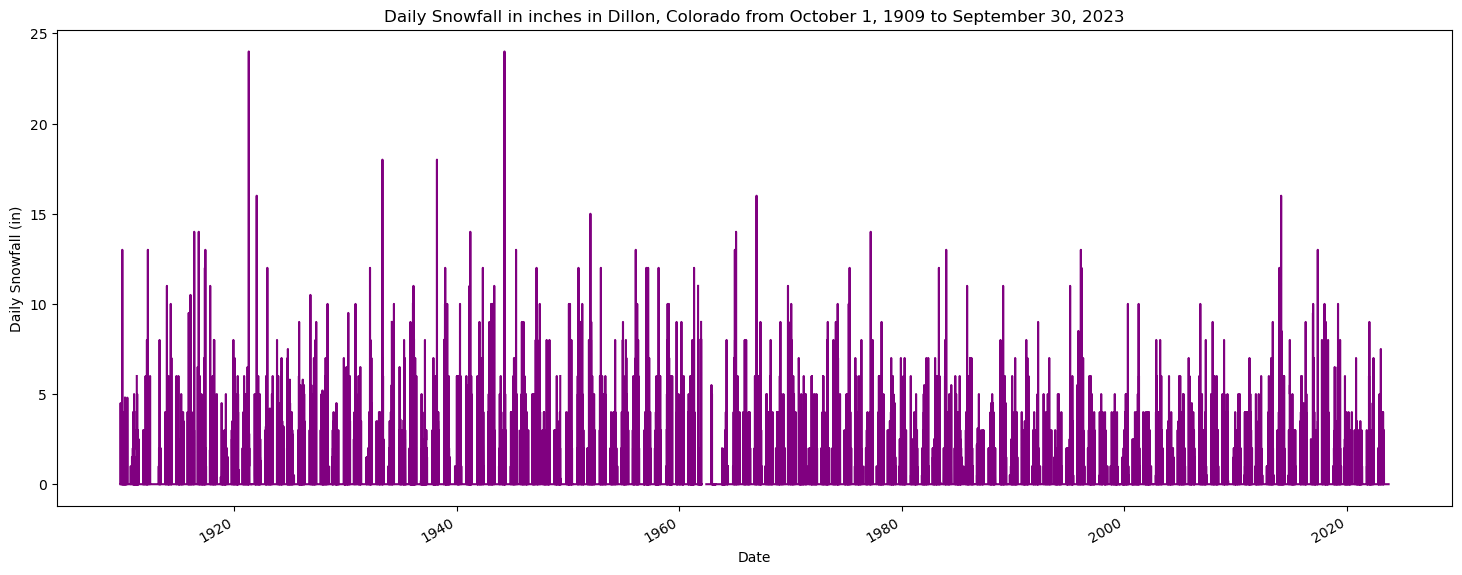

In [6]:
# Create a basic plot of the dillon_snow_in_df.

dillon_snow_in_df.plot(
    title = 'Daily Snowfall in inches in Dillon, Colorado from October 1, 1909 to September 30, 2023',
    xlabel = 'Date',
    ylabel = 'Daily Snowfall (in)',
    legend = False,
    figsize = (18,7),
    color = "purple"
    )

**Plot Description:** The purple plot above shows how much snow fell in Dillon, CO on each day between October 01, 1909 and September 30, 2023. The snowfall is measured in inches.  
**Plot Headline:** The Dillon, CO daily snowfall amounts look like they could be decreasing over time. Before about 1965, it looks like there were more days that received more than 10 inches of snow than after about 1965. Notably, there are also two days around 1920 and 1945 where more than 20 inches of snow fell in one day. After about 1965, there are no days where Dillon, CO received more than 20 inches. 

#### **4. Create Plots of the Total Snowfall for Each Water Year**

In [7]:
# Resample dillon_snow_in_df to show
# the total snowfall for each water year,
# starting on October 1 and ending on September 30.

dillon_ann_snow_in_df = dillon_snow_in_df.resample('A-SEP').sum()

dillon_ann_snow_in_df


,SNOW (in)
DATE,
1910-09-30,77.3
1911-09-30,55.6
1912-09-30,109.0
1913-09-30,22.0
1914-09-30,125.1
...,...
2019-09-30,152.1
2020-09-30,113.1
2021-09-30,89.4


<Axes: title={'center': 'Total Snowfall in inches for each Water Year from 1910 to 2023 in Dillon, Colorado'}, xlabel='Year', ylabel='Total Snowfall (in)'>

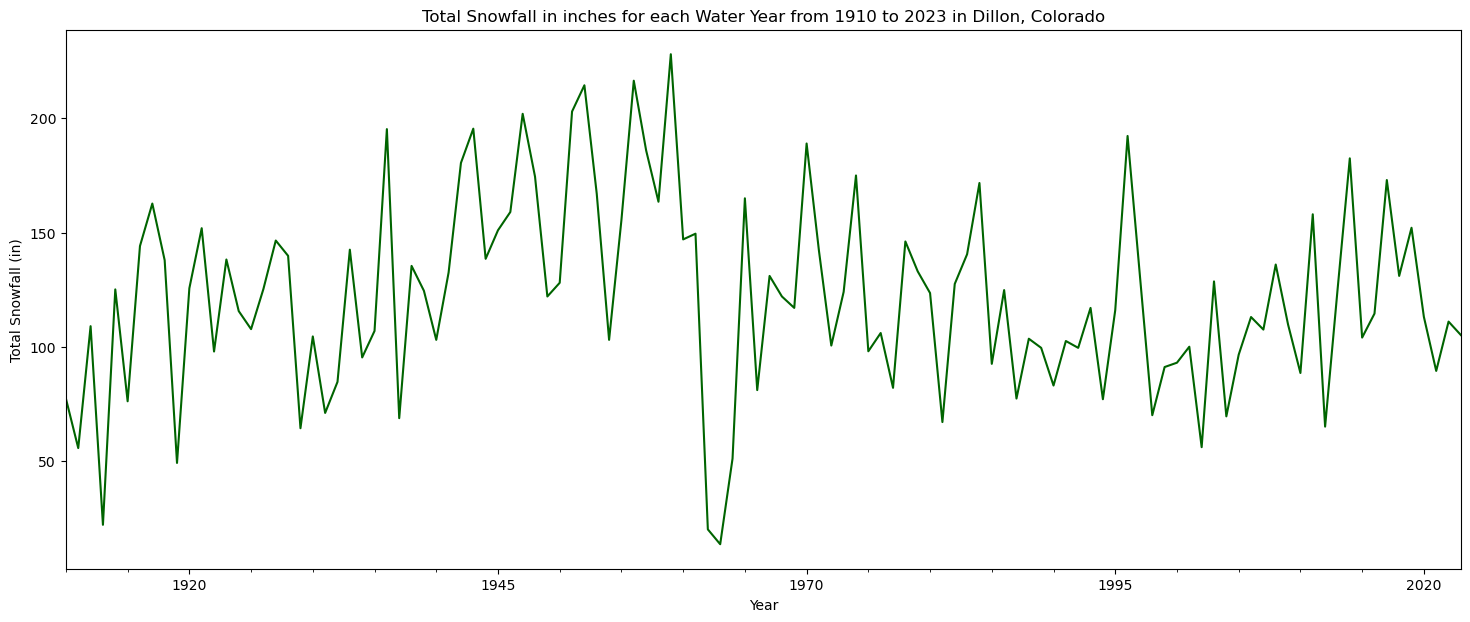

In [16]:
# Create a plot of dillon_ann_snow_in_df,
# total snowfall in inches
# for each water year
# in Dillon.

dillon_ann_snow_in_df.plot(
    title = 'Total Snowfall in inches for each Water Year from 1910 to 2023 in Dillon, Colorado',
    xlabel = 'Year',
    ylabel = 'Total Snowfall (in)',
    legend = False,
    figsize = (18,7),
    color = "darkgreen"
    )

In [15]:
# Create an interacitve plot of dillon_ann_snow_in_df.

interactive_dillon_ann_snow_in_df = dillon_ann_snow_in_df.hvplot(
    title = 'Total Snowfall in inches for each Water Year from 1910 to 2023 in Dillon, Colorado',
    xlabel = 'Year',
    ylabel = 'Total Snowfall (in)',
    legend=False,
    color="darkblue"
    )

interactive_dillon_ann_snow_in_df

/opt/conda/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/opt/conda/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:Curve   [DATE]   (SNOW (in))

##### Description and Headline for the "Total Snowfall in inches for each Water Year from 1910 to 2023 in Dillon, Colorado" Plots:
**Plot Description:** The dark green and dark blue plots above show how much total snow, in inches, Dillon, CO received in each water year from 1910 to 2023.  
**Plot Headline:** From 1910 to 1959, it looks like the yearly total snowfall was increasing overall. Then, from 1960 to 2023, it looks like the yearly total snowfall was decreasing overall. 

In [17]:
# Save Interactive plot.

hv.save(interactive_dillon_ann_snow_in_df,
        'Total Snowfall in inches for each Water Year from 1910 to 2023 in Dillon, Colorado Interactive Plot.html')

/opt/conda/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/opt/conda/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


#### **5. Create a Linear Ordinary Least Squares (OLS) Regression for the Total Snowfall for Each Water Year**

<Axes: ylabel='Frequency'>

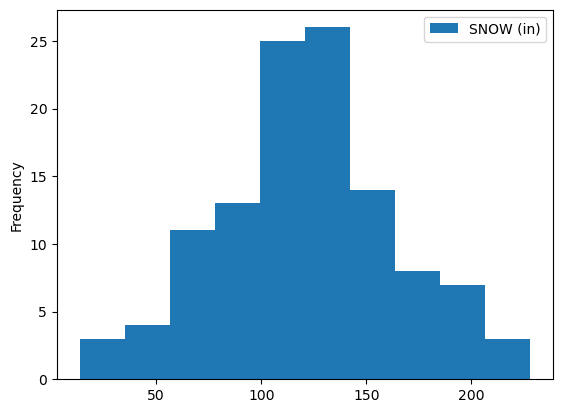

In [11]:
# Check Total Snowfall for Each Water Year DataFrame
# to make sure the values roughly follow a normal distribution.

dillon_ann_snow_in_df.plot.hist()

##### Why a Linear OLS Regression could be appropriate for the water yearly total snowfall measurements:
* As shown above, the water yearly total snowfall measurements for Dillon, CO roughly follow a normal distribution.
* I think we can assume that at least some of the variation in yearly snowfall is due to climate change. We know climate change can affect the temperatures of an area, which would also affect snowfall. If temperatures are rising, it could be that snowfall is decreasing because it isn't cold enough. There are other things that are not random that affect the climate such as El Nino and La Nina, which could also affect the amount of snow. So Linear OLS Regression may not be a perfect fit to find a trend line, but I think it is suitable.
* In terms of linearity, I think a Linear OLS Regression is okay. I do not know for sure whether the yearly total snowfall is changing at a constant rate. Despite this, similar to the bullet point above, I think Linear OLS Regression is suitable because it could be changing at a constant rate.
* In terms of stationarity, I don't really see the yearly total snowfall amounts fanning out. It doesn't look like we're consistently getting new highs and lows each years. Besides some very low snowfall amounts in the early 1960s, the yearly totals hover close together. 

In [12]:
# Reset Water Year Total Snowfall DataFrame index.

dillon_ann_snow_in_regr = dillon_ann_snow_in_df.reset_index()
dillon_ann_snow_in_regr

,DATE,SNOW (in)
0,1910-09-30,77.3
1,1911-09-30,55.6
2,1912-09-30,109.0
3,1913-09-30,22.0
4,1914-09-30,125.1
...,...,...
109,2019-09-30,152.1
110,2020-09-30,113.1
111,2021-09-30,89.4
112,2022-09-30,111.0


In [13]:
# Reshape 'Year' column to be a 2D array for scikit-learn
X = dillon_ann_snow_in_regr['DATE'].dt.year.values.reshape(-1, 1) 
y = dillon_ann_snow_in_regr['SNOW (in)'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")


Slope: -0.06729835361778826
Intercept: 253.7922123893806


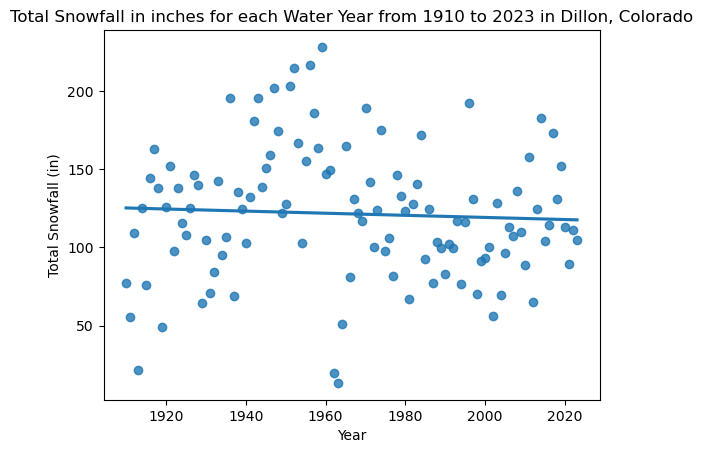

In [18]:
#Plot annual average temperature data with a trend line
ax = sns.regplot(
    x = dillon_ann_snow_in_regr.DATE.dt.year, 
    y = dillon_ann_snow_in_regr['SNOW (in)'].values,
    ci = None
    )

# Set plot labels
ax.set(
    title = 'Total Snowfall in inches for each Water Year from 1910 to 2023 in Dillon, Colorado',
    xlabel = 'Year',
    ylabel = 'Total Snowfall (in)'
    )

# Display the plot without extra text
plt.show()



**Plot Description:** The blue scatterplot above shows how much total snow, in inches, Dillon, CO received in each water year from 1910 to 2023. The plot also shows the Linear OLS Regression trend line. The trend line has a y-intercept of 253.79 inches and a slope of -0.07 inches per water year.  
**Plot Headline:** With the help of the Linear OLS Regression trend line, we can see that from water year 1910 to water year 2023, the amount of snowfall in Dillon, CO is slightly decreasing. Each water year, the total amount of snowfall is decreasing by about 0.07 inches. This could be due to climate change, although this plot doesn't prove that definitively.  
